# Explore here

In [1]:
# Your code here
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/NLP-project-tutorial/main/url_spam.csv')

df

,url,is_spam
0,https://briefingday.us8.list-manage.com/unsubs...,True
1,https://www.hvper.com/,True
2,https://briefingday.com/m/v4n3i4f3,True
3,https://briefingday.com/n/20200618/m#commentform,False
4,https://briefingday.com/fan,True
...,...,...
2994,https://www.smartcitiesworld.net/news/news/dee...,False
2995,https://www.youtube.com/watch,True
2996,https://techcrunch.com/2019/07/04/an-optimisti...,False
2997,https://www.technologyreview.com/2019/12/20/13...,False


In [3]:
df.duplicated().sum()

np.int64(630)

In [4]:
df.drop_duplicates(inplace=True)

In [6]:
df.shape

(2369, 2)

In [14]:
print(f"Cantidad de SPAM {len(df[df['is_spam']==True])}")
print(f"Cantidad de Correos {len(df[df['is_spam']==False])}")

Cantidad de SPAM 244
Cantidad de Correos 2125


In [16]:
import regex as re

def preprocess_text(text):
    # Eliminar cualquier caracter que no sea una letra (a-z) o un espacio en blanco ( )
    text = re.sub(r'[^a-z ]', " ", text)
    
    # Eliminar espacios en blanco
    text = re.sub(r'\s+[a-zA-Z]\s+', " ", text)
    text = re.sub(r'\^[a-zA-Z]\s+', " ", text)

    # Reducir espacios en blanco múltiples a uno único
    text = re.sub(r'\s+', " ", text.lower())

    # Eliminar tags
    text = re.sub("&lt;/?.*?&gt;"," &lt;&gt; ", text)

    return text.split()

In [17]:
df['url'] = df['url'].apply(preprocess_text)


In [18]:
df

,url,is_spam
0,"[https, briefingday, us, list, manage, com, un...",True
1,"[https, www, hvper, com]",True
2,"[https, briefingday, com, v, i]",True
3,"[https, briefingday, com, m, commentform]",False
4,"[https, briefingday, com, fan]",True
...,...,...
2993,"[https, www, theverge, com, disney, deepfake, ...",False
2994,"[https, www, smartcitiesworld, net, news, news...",False
2996,"[https, techcrunch, com, an, optimistic, view,...",False
2997,"[https, www, technologyreview, com, this, star...",False


In [22]:
from nltk import download
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

download('wordnet')
download('stopwords')

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
stop_words.add('com')  # Agregar 'com' a las palabras de parada
stop_words.add('http')  # Agregar 'http' a las palabras de parada
stop_words.add('https')  # Agregar 'https' a las palabras de parada

def lemmatize_text(text,lemmatizer=lemmatizer, stop_words=stop_words):
    tokens =[lemmatizer.lemmatize(word) for word in text if word not in stop_words]
    tokens = [word for word in tokens if len(word) > 3]  # Eliminar palabras de un solo carácter
    tokens = [word for word in tokens if word not in stop_words]  # Eliminar palabras de parada
    return tokens

df['url'] = df['url'].apply(lemmatize_text)

[nltk_data] Downloading package wordnet to /home/vscode/nltk_data...
[nltk_data] Downloading package stopwords to /home/vscode/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [23]:
df

,url,is_spam
0,"[briefingday, list, manage, unsubscribe]",True
1,[hvper],True
2,[briefingday],True
3,"[briefingday, commentform]",False
4,[briefingday],True
...,...,...
2993,"[theverge, disney, deepfake, face, swapping, r...",False
2994,"[smartcitiesworld, news, news, deepfake, techn...",False
2996,"[techcrunch, optimistic, view, deepfakes]",False
2997,"[technologyreview, startup, claim, deepfakes, ...",False


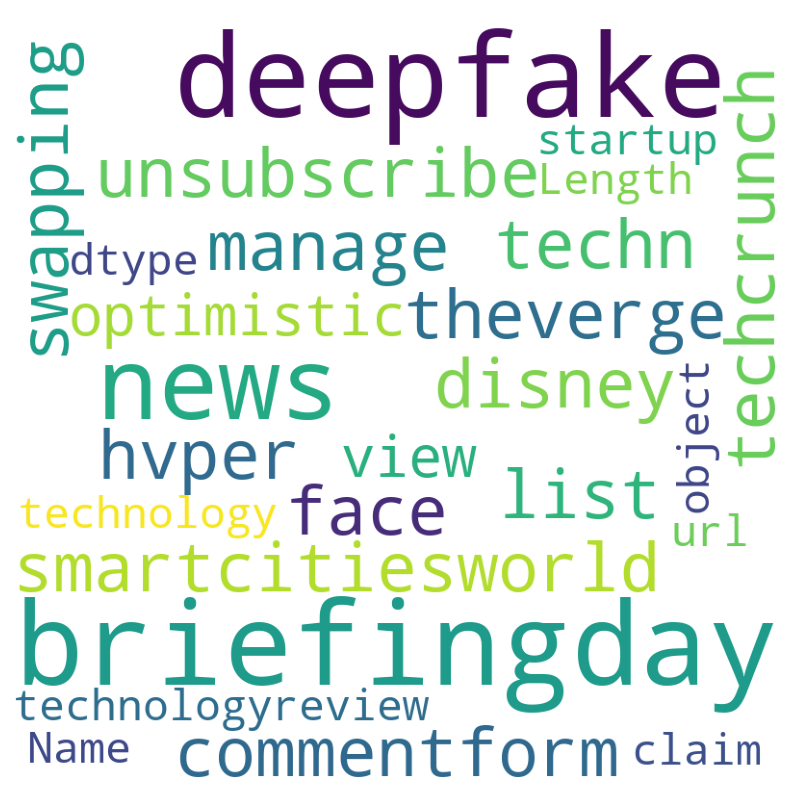

In [26]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=800, random_state=42, background_color='white', max_words=200, min_font_size=20).generate(str(df.url))

fig = plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features = 5000, max_df = 0.8, min_df = 5)
X = df['url']
y= df['is_spam']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tokens_list = [" ".join(tokens) for tokens in X_train]
token_list_2 = [" ".join(tokens) for tokens in X_test]

X_train_vectorized = vectorizer.fit_transform(tokens_list).toarray()
X_test_vectorized = vectorizer.transform(token_list_2).toarray()

In [28]:
from sklearn.svm import SVC

model = SVC(kernel='linear', C=1.0, random_state=42)
model.fit(X_train_vectorized, y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [29]:
y_pred = model.predict(X_test_vectorized)

In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9556962025316456

In [34]:
from pickle import dump

dump(model, open('../models/svm_lineal_C_1_42.pkl', 'wb'))